In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
import re


# 2.2.1 LMs Validate Data Abstractor Annotations

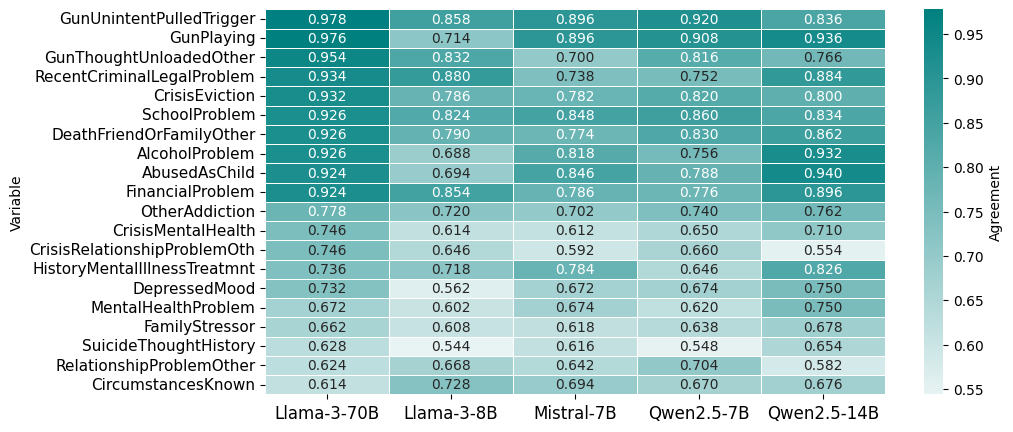

In [3]:
def wrap_labels(labels, max_length=10):
    wrapped_labels = []
    for label in labels:
        if len(label) > max_length:
            wrapped_label = '\n'.join([label[i:i+max_length] for i in range(0, len(label), max_length)])
            wrapped_labels.append(wrapped_label)
        else:
            wrapped_labels.append(label)
    return wrapped_labels

file_path = "results/balanced_eval_all_models_accuracy.csv"
df = pd.read_csv(file_path)
df = df.rename(columns={df.columns[0]: "Variable"})

df = df.sort_values(by="Meta-Llama-3-70B-Instruct", ascending=False)
df = pd.concat([df.head(10), df.tail(10)])
var = df['Variable'].tolist()
var_changed = [i[:-2] for i in var]
df['Variable'] = var_changed

df = df.drop(['Proportion', 'Ensemble'], axis=1)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df.set_index("Variable", inplace=True)

new_labels = wrap_labels(df.columns)

new_labels = ['Llama-3-70B', 'Llama-3-8B', 'Mistral-7B', 'Qwen2.5-7B', 'Qwen2.5-14B']


plt.figure(figsize=(10, 5)) 

cmap = sns.light_palette("teal", as_cmap=True)  

sns.heatmap(df, annot=True, cmap=cmap, fmt=".3f",  
                 linewidths=0.5,  
                 linecolor="white",
                 cbar_kws={'label': 'Agreement'})  

plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=new_labels, rotation=0, fontsize=10)
plt.yticks(fontsize=11)
plt.xticks(fontsize=12)
# plt.savefig("balanced_eval_all_models_accuracy_condense.pdf", dpi=300, bbox_inches='tight')
plt.show()


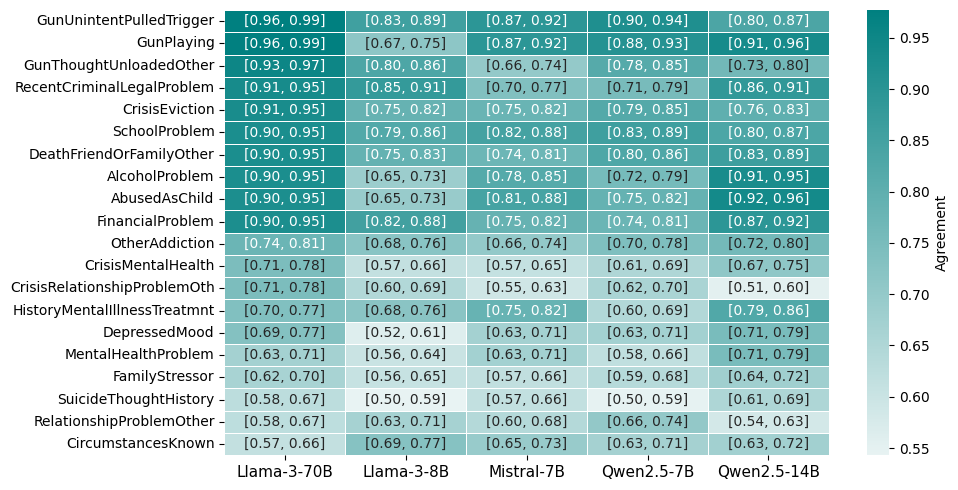

In [4]:


ci_data = {
    "GunUnintentPulledTrigger": {"Llama-3-70B": [0.964, 0.990], "Llama-3-8B": [0.828, 0.888], "Mistral-7B": [0.868, 0.922], "Qwen2.5-7B": [0.896, 0.942], "Qwen2.5-14B": [0.804, 0.868]},
    "GunPlaying": {"Llama-3-70B": [0.962, 0.988], "Llama-3-8B": [0.674, 0.754], "Mistral-7B": [0.868, 0.922], "Qwen2.5-7B": [0.882, 0.932], "Qwen2.5-14B": [0.914, 0.956]},
    "GunThoughtUnloadedOther": {"Llama-3-70B": [0.934, 0.972], "Llama-3-8B": [0.800, 0.864], "Mistral-7B": [0.658, 0.740], "Qwen2.5-7B": [0.782, 0.850], "Qwen2.5-14B": [0.728, 0.802]},
    "RecentCriminalLegalProblem": {"Llama-3-70B": [0.912, 0.954], "Llama-3-8B": [0.852, 0.908], "Mistral-7B": [0.696, 0.774], "Qwen2.5-7B": [0.714, 0.790], "Qwen2.5-14B": [0.856, 0.912]},
    "CrisisEviction": {"Llama-3-70B": [0.910, 0.952], "Llama-3-8B": [0.750, 0.822], "Mistral-7B": [0.746, 0.818], "Qwen2.5-7B": [0.786, 0.854], "Qwen2.5-14B": [0.764, 0.834]},
    "SchoolProblem": {"Llama-3-70B": [0.902, 0.948], "Llama-3-8B": [0.790, 0.858], "Mistral-7B": [0.816, 0.880], "Qwen2.5-7B": [0.830, 0.890], "Qwen2.5-14B": [0.800, 0.866]},
    "DeathFriendOrFamilyOther": {"Llama-3-70B": [0.902, 0.948], "Llama-3-8B": [0.754, 0.826], "Mistral-7B": [0.738, 0.810], "Qwen2.5-7B": [0.796, 0.864], "Qwen2.5-14B": [0.832, 0.892]},
    "AlcoholProblem": {"Llama-3-70B": [0.902, 0.948], "Llama-3-8B": [0.646, 0.728], "Mistral-7B": [0.784, 0.852], "Qwen2.5-7B": [0.718, 0.792], "Qwen2.5-14B": [0.910, 0.952]},
    "AbusedAsChild": {"Llama-3-70B": [0.900, 0.946], "Llama-3-8B": [0.652, 0.734], "Mistral-7B": [0.814, 0.878], "Qwen2.5-7B": [0.752, 0.824], "Qwen2.5-14B": [0.918, 0.960]},
    "FinancialProblem": {"Llama-3-70B": [0.900, 0.946], "Llama-3-8B": [0.824, 0.884], "Mistral-7B": [0.750, 0.822], "Qwen2.5-7B": [0.740, 0.812], "Qwen2.5-14B": [0.868, 0.922]},
    "OtherAddiction": {"Llama-3-70B": [0.742, 0.814], "Llama-3-8B": [0.680, 0.760], "Mistral-7B": [0.662, 0.742], "Qwen2.5-7B": [0.700, 0.778], "Qwen2.5-14B": [0.724, 0.798]},
    "CrisisMentalHealth": {"Llama-3-70B": [0.708, 0.784], "Llama-3-8B": [0.570, 0.656], "Mistral-7B": [0.568, 0.654], "Qwen2.5-7B": [0.608, 0.692], "Qwen2.5-14B": [0.670, 0.750]},
    "CrisisRelationshipProblemOth": {"Llama-3-70B": [0.708, 0.784], "Llama-3-8B": [0.602, 0.688], "Mistral-7B": [0.548, 0.634], "Qwen2.5-7B": [0.618, 0.700], "Qwen2.5-14B": [0.510, 0.598]},
    "HistoryMentalIllnessTreatmnt": {"Llama-3-70B": [0.696, 0.774], "Llama-3-8B": [0.678, 0.758], "Mistral-7B": [0.748, 0.820], "Qwen2.5-7B": [0.602, 0.688], "Qwen2.5-14B": [0.792, 0.860]},
    "DepressedMood": {"Llama-3-70B": [0.692, 0.770], "Llama-3-8B": [0.518, 0.606], "Mistral-7B": [0.630, 0.712], "Qwen2.5-7B": [0.632, 0.714], "Qwen2.5-14B": [0.712, 0.788]},
    "MentalHealthProblem": {"Llama-3-70B": [0.630, 0.712], "Llama-3-8B": [0.558, 0.644], "Mistral-7B": [0.632, 0.714], "Qwen2.5-7B": [0.576, 0.662], "Qwen2.5-14B": [0.712, 0.788]},
    "FamilyStressor": {"Llama-3-70B": [0.620, 0.704], "Llama-3-8B": [0.564, 0.650], "Mistral-7B": [0.574, 0.660], "Qwen2.5-7B": [0.594, 0.680], "Qwen2.5-14B": [0.636, 0.718]},
    "SuicideThoughtHistory": {"Llama-3-70B": [0.584, 0.670], "Llama-3-8B": [0.500, 0.586], "Mistral-7B": [0.572, 0.658], "Qwen2.5-7B": [0.504, 0.592], "Qwen2.5-14B": [0.612, 0.694]},
    "RelationshipProblemOther": {"Llama-3-70B": [0.580, 0.666], "Llama-3-8B": [0.626, 0.708], "Mistral-7B": [0.598, 0.684], "Qwen2.5-7B": [0.662, 0.744], "Qwen2.5-14B": [0.538, 0.626]},
    "CircumstancesKnown": {"Llama-3-70B": [0.570, 0.656], "Llama-3-8B": [0.688, 0.766], "Mistral-7B": [0.652, 0.734], "Qwen2.5-7B": [0.628, 0.710], "Qwen2.5-14B": [0.634, 0.716]}
}


mean_df = pd.DataFrame({var: {model: np.mean(ci) for model, ci in model_dict.items()} for var, model_dict in ci_data.items()}).T
annot_df = pd.DataFrame({var: {model: f"[{ci[0]:.2f}, {ci[1]:.2f}]" for model, ci in model_dict.items()} for var, model_dict in ci_data.items()}).T

mean_df = mean_df[["Llama-3-70B", "Llama-3-8B", "Mistral-7B", "Qwen2.5-7B", "Qwen2.5-14B"]]
annot_df = annot_df[["Llama-3-70B", "Llama-3-8B", "Mistral-7B", "Qwen2.5-7B", "Qwen2.5-14B"]]

plt.figure(figsize=(10, 5))
cmap = sns.light_palette("teal", as_cmap=True)
sns.heatmap(mean_df, annot=annot_df, fmt="", cmap=cmap, linewidths=0.5, linecolor="white", cbar_kws={'label': 'Agreement'})

plt.xticks(fontsize=11, rotation=0)
plt.yticks(fontsize=10)

plt.tight_layout()
# plt.savefig("balanced_eval_all_models_CI.pdf", dpi=300, bbox_inches='tight')

plt.show()


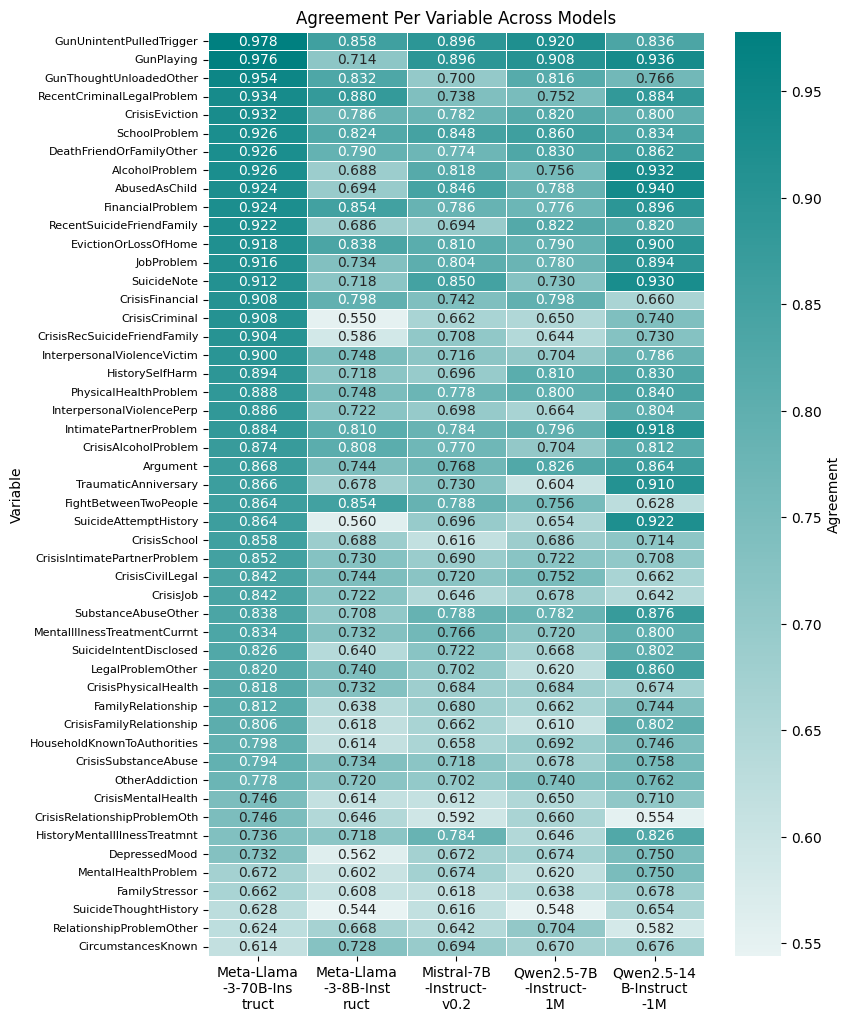

In [5]:


def wrap_labels(labels, max_length=10):
    wrapped_labels = []
    for label in labels:
        if len(label) > max_length:
            wrapped_label = '\n'.join([label[i:i+max_length] for i in range(0, len(label), max_length)])
            wrapped_labels.append(wrapped_label)
        else:
            wrapped_labels.append(label)
    return wrapped_labels

file_path = "results/balanced_eval_all_models_accuracy.csv"  
df = pd.read_csv(file_path)
df = df.rename(columns={df.columns[0]: "Variable"})

df = df.sort_values(by="Meta-Llama-3-70B-Instruct", ascending=False)
var = df['Variable'].tolist()
var_changed = [i[:-2] for i in var]
df['Variable'] = var_changed

df = df.drop(['Proportion', 'Ensemble'], axis=1)


df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df.set_index("Variable", inplace=True)

new_labels = wrap_labels(df.columns)

plt.figure(figsize=(8, 12)) 
cmap = sns.light_palette("teal", as_cmap=True)  

sns.heatmap(df, annot=True, cmap=cmap, fmt=".3f",  
                 linewidths=0.5,  
                 linecolor="white",  
                 cbar_kws={'label': 'Agreement'}) 

plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=new_labels, rotation=0, fontsize=10)
plt.yticks(fontsize=8)
plt.title("Agreement Per Variable Across Models", fontsize=12)

# plt.savefig("balanced_eval_all_models_accuracy.pdf", format="pdf", bbox_inches="tight")
plt.show()


# 3.2 Simulated Codebook Development: Existing NVDRS Variables

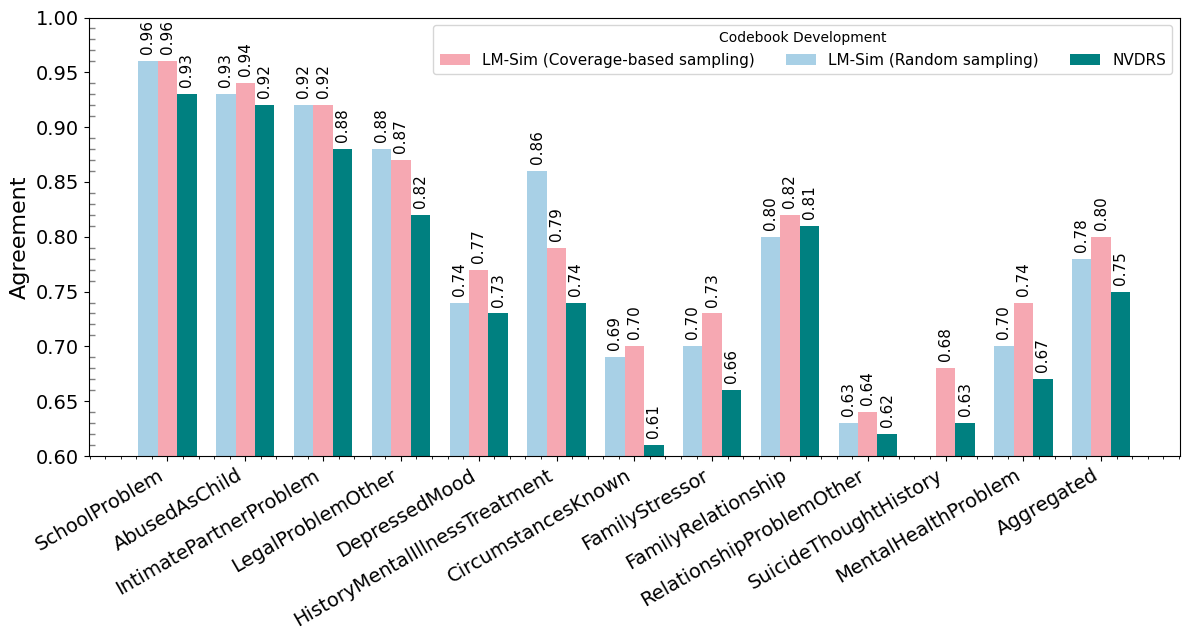

In [6]:


# Data from the LaTeX table
variables = [
    "SchoolProblem", "AbusedAsChild", "IntimatePartnerProblem", "LegalProblemOther", 
    "DepressedMood", "HistoryMentalIllnessTreatment", "CircumstancesKnown", 
    "FamilyStressor", "FamilyRelationship", "RelationshipProblemOther", 
    "SuicideThoughtHistory", "MentalHealthProblem", "Aggregated"
]

hitl_random = np.array([
    0.96, 0.93, 0.92, 0.88, 0.74, 0.86, 0.69, 0.70, 0.80, 0.63, 0.59, 0.70, 0.78
])

hitl_coverage = np.array([
    0.96, 0.94, 0.92, 0.87, 0.77, 0.79, 0.70, 0.73, 0.82, 0.64, 0.68, 0.74, 0.8
])

nvdrs_codebook = np.array([
    0.93, 0.92, 0.88, 0.82, 0.73, 0.74, 0.61, 0.66, 0.81, 0.62, 0.63, 0.67, 0.75
])

x = np.arange(len(variables))  
width = 0.25 
colors = ['#a8d0e6', '#f6a8b2', 'teal']  
fig, ax = plt.subplots(figsize=(12, 6.5))

bars_coverage = ax.bar(x, hitl_coverage, width, label='LM-Sim (Coverage-based sampling)', color=colors[1], capsize=3)
bars_random = ax.bar(x - width, hitl_random, width, label='LM-Sim (Random sampling)', color=colors[0], capsize=3)
bars_nvdrs = ax.bar(x + width, nvdrs_codebook, width, label='NVDRS', color=colors[2], capsize=3)

def add_data_labels(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.annotate(f'{value:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 5),  
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11, rotation=90)  

add_data_labels(bars_random, hitl_random)
add_data_labels(bars_coverage, hitl_coverage)
add_data_labels(bars_nvdrs, nvdrs_codebook)


ax.set_xticks(x)
ax.set_xticklabels(variables, rotation=30, ha='right', fontsize=14)  
ax.set_ylabel("Agreement", fontsize=16)
ax.set_ylim(0.6, 1.0)  

ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

ax.legend(title="Codebook Development", loc='upper right', fontsize=11, ncol=3)

plt.minorticks_on()
ax.tick_params(axis='y', which='minor', length=4, width=1, color='gray', direction='in')

plt.tight_layout()

# plt.savefig("nvdrs_hitl_acc_sim.pdf", dpi=300, bbox_inches='tight')

plt.show()


# Appendix

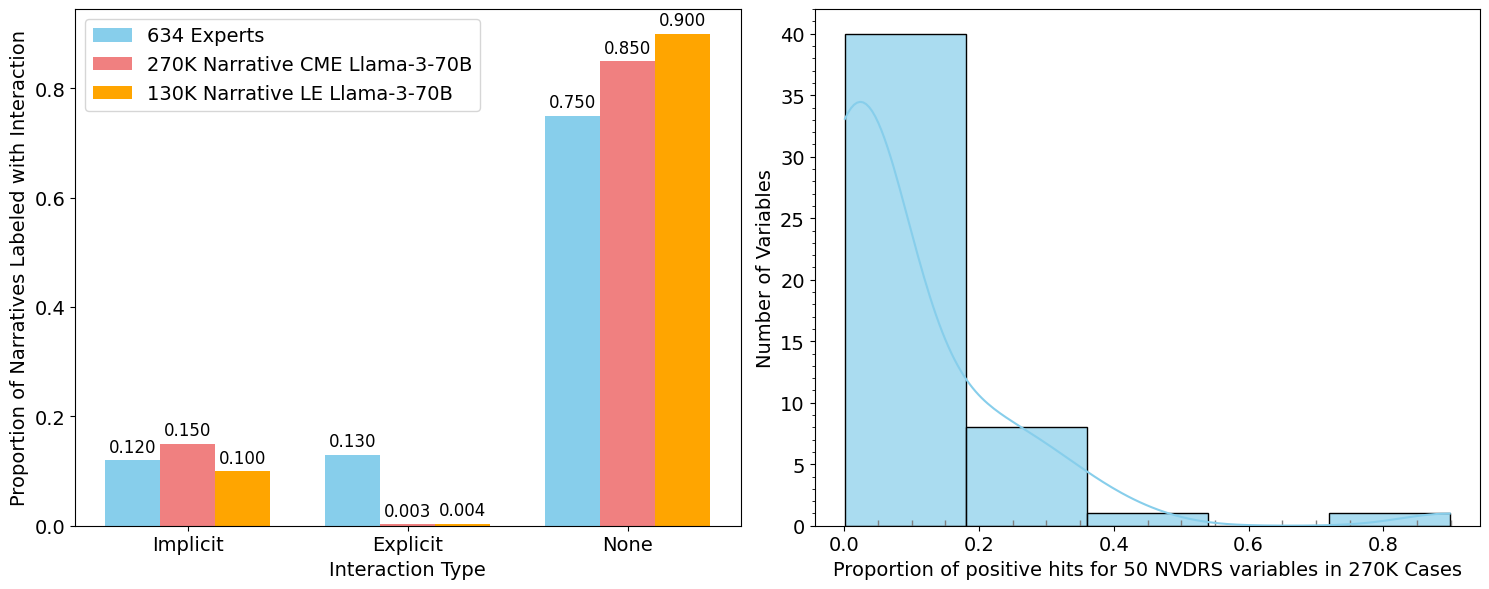

In [7]:
file_path = "results/balanced_eval_all_models_accuracy.csv"
df = pd.read_csv(file_path)
groups = ['Implicit', 'Explicit', 'None']
experts_values = [0.12, 0.13, 0.75] 
llama_values = [0.15, 0.003, 0.85]  
le_values = [0.10, 0.004, 0.9] 

x = np.arange(len(groups))  
width = 0.25 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  


rects1 = ax1.bar(x - width, experts_values, width, label='634 Experts', color='skyblue')
rects2 = ax1.bar(x, llama_values, width, label='270K Narrative CME Llama-3-70B', color='lightcoral')
rects3 = ax1.bar(x + width, le_values, width, label='130K Narrative LE Llama-3-70B', color='orange')

ax1.set_xlabel('Interaction Type', fontsize=14)
ax1.set_ylabel('Proportion of Narratives Labeled with Interaction', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(groups, fontsize=14)
ax1.legend(fontsize=14)
ax1.tick_params(axis='both', labelsize=14)  


def add_data_labels(rects, values, ax):
    for rect, value in zip(rects, values):
        height = rect.get_height()
        ax.annotate(f'{value:.3f}',  
                    xy=(rect.get_x() + rect.get_width() / 2, height), 
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=12)  

add_data_labels(rects1, experts_values, ax1)
add_data_labels(rects2, llama_values, ax1)
add_data_labels(rects3, le_values, ax1)

props = df['Proportion'].tolist()  
sns.histplot(props, kde=True, color="skyblue", bins=5, alpha=0.7, ax=ax2)

ax2.grid(False)
ax2.minorticks_on()
ax2.tick_params(axis='x', which='minor', length=4, width=1, color='gray', direction='in')

ax2.set_xlabel('Proportion of positive hits for 50 NVDRS variables in 270K Cases', fontsize=14)
ax2.set_ylabel('Number of Variables', fontsize=14)
ax2.tick_params(axis='both', labelsize=14) 

plt.tight_layout()

plt.savefig("combined_plots.pdf", bbox_inches='tight')

plt.show()


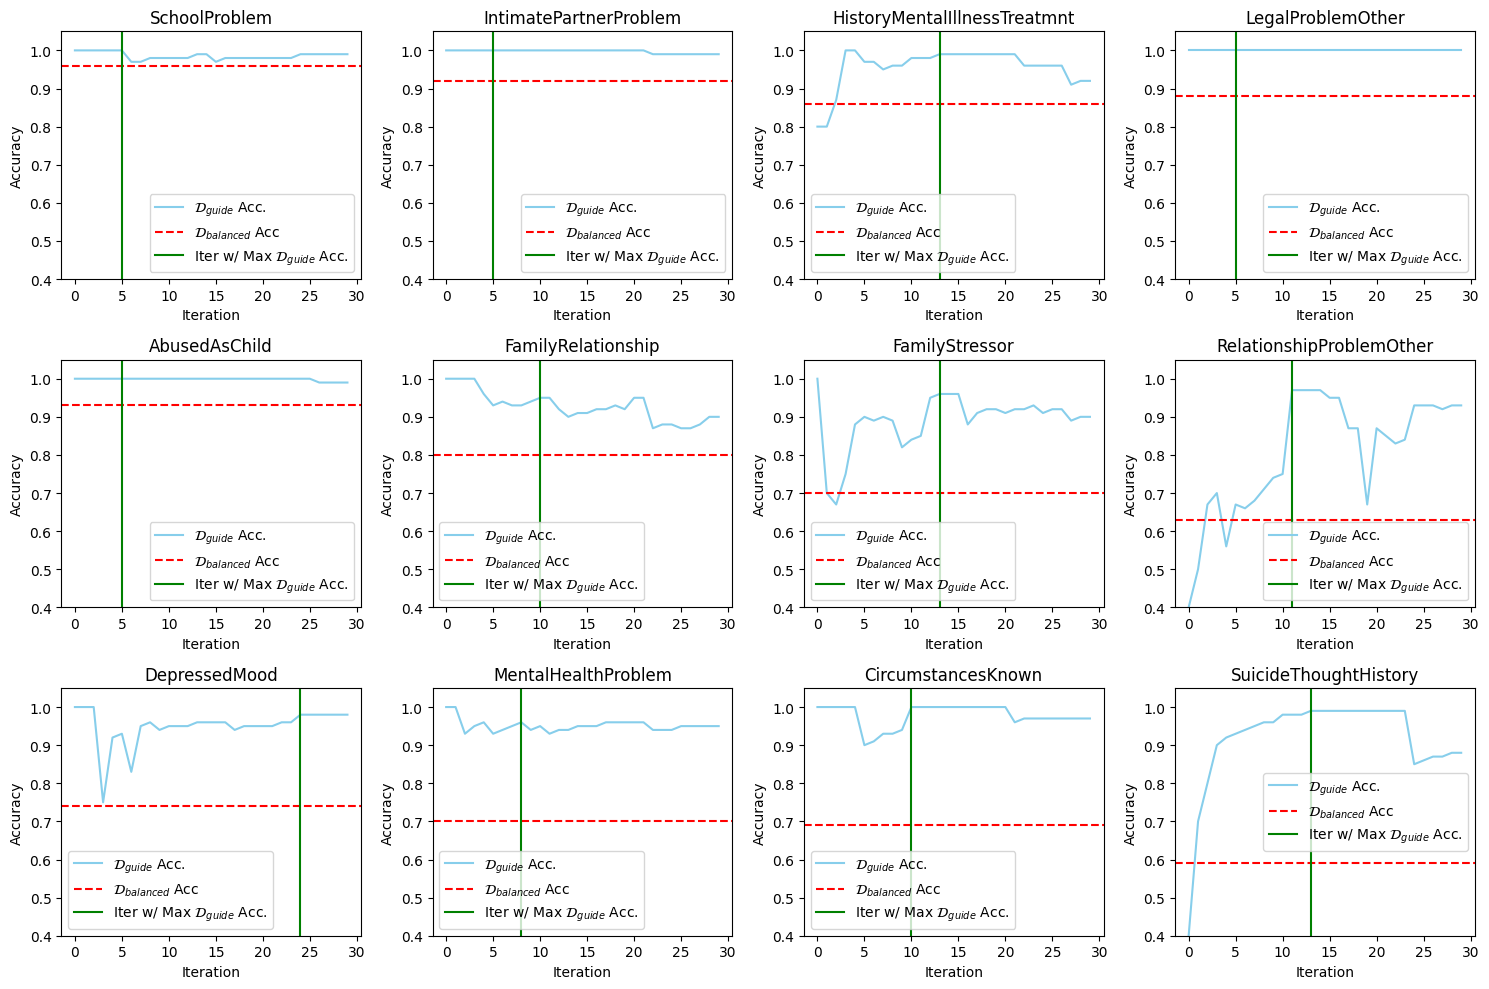

In [8]:
csv_files = glob.glob(os.path.join('results', "*random_Meta-Llama-3-70B-Instruct_per_iteration_stats_FINAL*.csv"))
# csv_files = glob.glob(os.path.join('results', "*coverage_based_Meta-Llama-3-70B-Instruct_per_iteration_stats_FINAL.csv"))

variable_names = []
for i in csv_files:
    match = re.search(r'/(.*?)_random_', i)
    var = match.group(1)[10:][:-2] if match else None
    variable_names.append(var)

max_iter = []
for i in csv_files:
    df = pd.read_csv(i)
    max_index = df.loc[5:, 'eval_accuracy'].idxmax()
    max_iter.append(max_index)

variable_names = []
for i in csv_files:
    match = re.search(r'/(.*?)_random_', i)

    # Extracted value
    var = match.group(1)[:-2] if match else None
    
    variable_names.append(var)


eval_accs = []
test_acc = []
for i in csv_files:
    df = pd.read_csv(i)
    eval_accs.append(df['eval_accuracy'].tolist()) 
    test_acc.append(df['test_accuracy'].tolist()[-1]) 

fig, axes = plt.subplots(3, 4, figsize=(15, 10))  
axes = axes.flatten() 

for i, ax in enumerate(axes):
    sns.lineplot(x=range(len(eval_accs[i])), y=eval_accs[i], ax=ax, label="$\mathcal{D}_{guide}$ Acc.", color='skyblue')
    ax.axhline(y=test_acc[i], color='red', linestyle='--', label="$\mathcal{D}_{balanced}$ Acc")  
    ax.axvline(x=max_iter[i], color='green', linestyle='-', label="Iter w/ Max $\mathcal{D}_{guide}$ Acc.")  

    ax.set_title(variable_names[i])  
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Accuracy")
    ax.set_ylim(0.4, 1.05)  

    ax.legend()


plt.tight_layout()
plt.show()



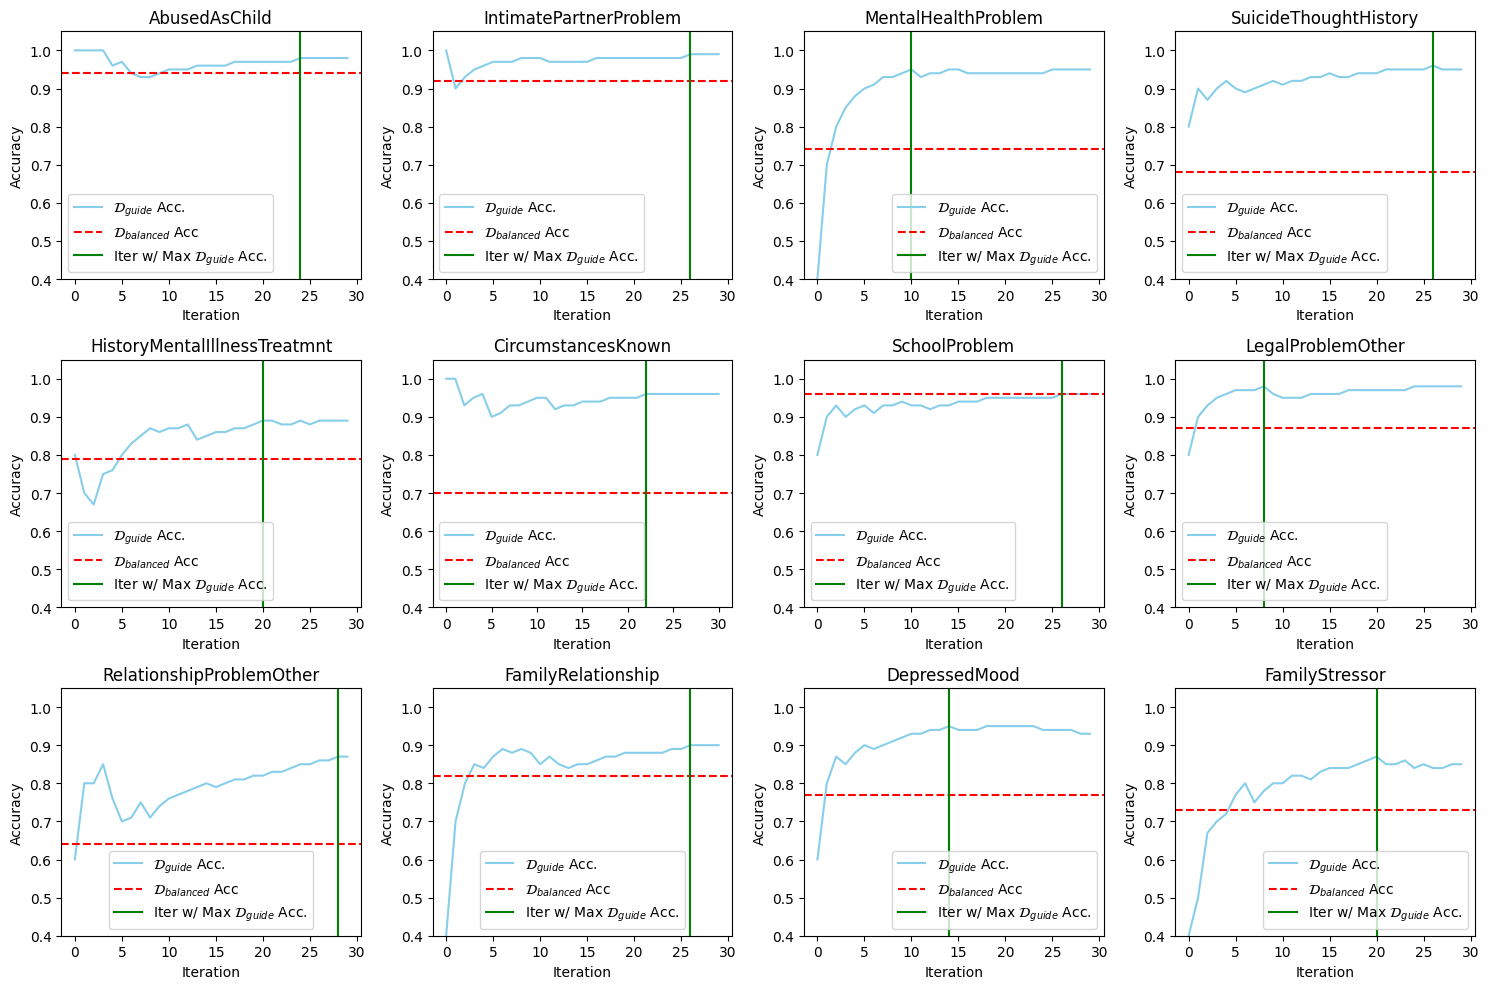

In [9]:
# csv_files = glob.glob(os.path.join('results', "*random_Meta-Llama-3-70B-Instruct_per_iteration_stats_FINAL*.csv"))
csv_files = glob.glob(os.path.join('results', "*coverage_based_Meta-Llama-3-70B-Instruct_per_iteration_stats_FINAL.csv"))

variable_names = []
for i in csv_files:
    match = re.search(r'/(.*?)_coverage_based_', i)
    var = match.group(1)[10:][:-2] if match else None
    variable_names.append(var)

max_iter = []
for i in csv_files:
    df = pd.read_csv(i)
    max_index = df.loc[5:, 'eval_accuracy'].idxmax()
    max_iter.append(max_index)

variable_names = []
for i in csv_files:
    match = re.search(r'/(.*?)_coverage_based_', i)

    # Extracted value
    var = match.group(1)[:-2] if match else None
    
    variable_names.append(var)


eval_accs = []
test_acc = []
for i in csv_files:
    df = pd.read_csv(i)
    eval_accs.append(df['eval_accuracy'].tolist()) 
    test_acc.append(df['test_accuracy'].tolist()[-1]) 

fig, axes = plt.subplots(3, 4, figsize=(15, 10))  
axes = axes.flatten() 

for i, ax in enumerate(axes):
    sns.lineplot(x=range(len(eval_accs[i])), y=eval_accs[i], ax=ax, label="$\mathcal{D}_{guide}$ Acc.", color='skyblue')
    ax.axhline(y=test_acc[i], color='red', linestyle='--', label="$\mathcal{D}_{balanced}$ Acc")  
    ax.axvline(x=max_iter[i], color='green', linestyle='-', label="Iter w/ Max $\mathcal{D}_{guide}$ Acc.")  

    ax.set_title(variable_names[i])  
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Accuracy")
    ax.set_ylim(0.4, 1.05)  

    ax.legend()


plt.tight_layout()
plt.show()

